Nama : Usman Alwan Sya
Nim  : A11.2020.12505


Judul Topik accuracy penyakit jantung menggunakan 3 algoritma

Memprediksi accuracy penyakit jantung pasien menggunakan 3 algoritma yaitu XGboost, Decision Tree dan Random Forest

In [74]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1. Pengumpulan data


In [75]:
dir = 'hungarian.data'
with open(dir, encoding='latin1') as file:
    lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

2. Menelaah Data
code di bawah akan menghasilkan tabel berisi 76 kolom fitur yang nantinya akan diseleksi
kembali manakah fitur yang akan digunakan

In [105]:
data = itertools.takewhile(lambda x: len(x) == 76,(' '.join(lines[i:(i + 10)]).split()for i in range(0, len(lines), 10)))

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


3.Validasi Data
Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat
dilakukan penanganan sesuai dengan kondisinya. Didalam dataset ini nilai -9.0 merupakan
nilai NULL oleh karena itu diubah agar dataset ini sesuai dengan kondisi

In [77]:
# Mengonversi semua kolom menjadi tipe data numerik, jika memungkinkan
df = df.apply(pd.to_numeric, errors='coerce')

In [78]:
# Mengganti nilai -9 dan -9. dengan NaN
df.replace([-9, -9.], np.nan, inplace=True)


In [79]:
# Menampilkan 5 baris pertama dari DataFrame untuk memverifikasi perubahan
print(df.head())

     0   1   2   3   4   5   6   7   8      9   ...   66  67  68  69  70  71  \
0  1254   0  40   1   1   0   0 NaN   2  140.0  ...  NaN NaN   1   1   1   1   
1  1255   0  49   0   1   0   0 NaN   3  160.0  ...  NaN NaN   1   1   1   1   
2  1256   0  37   1   1   0   0 NaN   2  130.0  ...  NaN NaN   1   1   1   1   
3  1257   0  48   0   1   1   1 NaN   4  138.0  ...  2.0 NaN   1   1   1   1   
4  1258   0  54   1   1   0   1 NaN   3  150.0  ...  1.0 NaN   1   1   1   1   

   72  73  74  75  
0   1 NaN NaN NaN  
1   1 NaN NaN NaN  
2   1 NaN NaN NaN  
3   1 NaN NaN NaN  
4   1 NaN NaN NaN  

[5 rows x 76 columns]


In [80]:
# Menampilkan jumlah nilai NaN per kolom
print(df.isna().sum())

0       0
1       0
2       0
3       0
4       0
     ... 
71      0
72      0
73    266
74    294
75    294
Length: 76, dtype: int64


In [81]:
df_cleaned_columns = df.dropna(axis=1)

In [82]:
print(df_cleaned_columns.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
8     0
19    0
20    0
21    0
39    0
42    0
54    0
55    0
56    0
57    0
68    0
69    0
70    0
71    0
72    0
dtype: int64


In [83]:
# Menampilkan 5 baris pertama dari DataFrame yang telah dibersihkan
print(df_cleaned_columns.head())

     0   1   2   3   4   5   6   8   19  20  ...  42  54  55  56  57  68  69  \
0  1254   0  40   1   1   0   0   2  12  16  ...  20  12  20  84   0   1   1   
1  1255   0  49   0   1   0   0   3  11  16  ...  13  11  20  84   1   1   1   
2  1256   0  37   1   1   0   0   2  11  21  ...  14  11  26  84   0   1   1   
3  1257   0  48   0   1   1   1   4   9  21  ...  22   9  30  84   3   1   1   
4  1258   0  54   1   1   0   1   3   7  25  ...   9   7  30  84   0   1   1   

   70  71  72  
0   1   1   1  
1   1   1   1  
2   1   1   1  
3   1   1   1  
4   1   1   1  

[5 rows x 22 columns]


4.Menentukan Objek Data
Dalam dataset Hungarian yang hanya digunakan adalah 14 fitur

In [84]:
# Indeks kolom yang diperlukan
selected_columns = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43,50, 57]

In [85]:
# Pilih kolom yang diperlukan
df_selected = df.iloc[:, selected_columns]

In [86]:
# Beri nama kolom
df_selected.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [87]:
# Mengisi nilai NaN dengan mean dari masing-masing kolom
df_cleaned = df_selected.fillna(df_selected.mean())

print(df_cleaned.head(5))

   age  sex  cp  trestbps        chol  fbs  restecg  thalach  exang  oldpeak  \
0   40    1   2     140.0  289.000000  0.0      0.0    172.0    0.0      0.0   
1   49    0   3     160.0  180.000000  0.0      0.0    156.0    0.0      1.0   
2   37    1   2     130.0  283.000000  0.0      1.0     98.0    0.0      0.0   
3   48    0   4     138.0  214.000000  0.0      0.0    108.0    1.0      1.5   
4   54    1   3     150.0  250.848708  0.0      0.0    122.0    0.0      0.0   

      slope    ca      thal  num  
0  1.894231  2.25  5.642857    0  
1  2.000000  2.25  5.642857    1  
2  1.894231  2.25  5.642857    0  
3  2.000000  2.25  5.642857    3  
4  1.894231  2.25  5.642857    0  


5.Membersihkan Data
Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan
lebih akurat.

In [95]:
# Mengganti nama kolom terakhir dari 'num' ke 'target' agar sesuai dengan output yang diinginkan
df_cleaned.rename(columns={'num': 'target'}, inplace=True)

In [96]:
# Mengganti nama kolom terakhir dari 'num' ke 'target' agar sesuai dengan output yang diinginkan
df_cleaned.rename(columns={'num': 'target'}, inplace=True)

In [97]:
# Hitung matriks korelasi
corr_matrix = df_cleaned.corr()

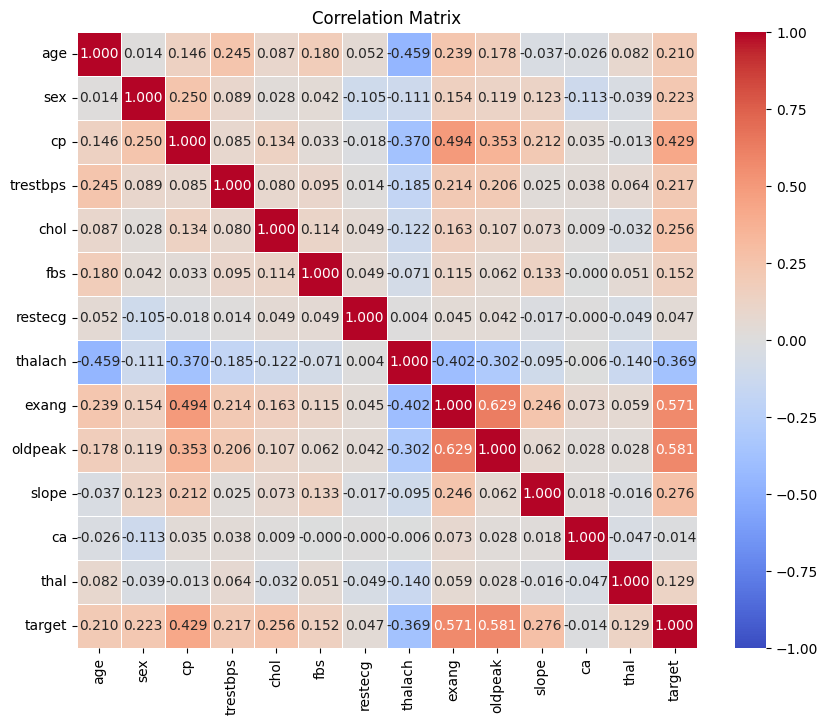

In [98]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Konstruksi Data
Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe
data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang
sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8844\2109891741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'num': 'target'}, inplace=True)


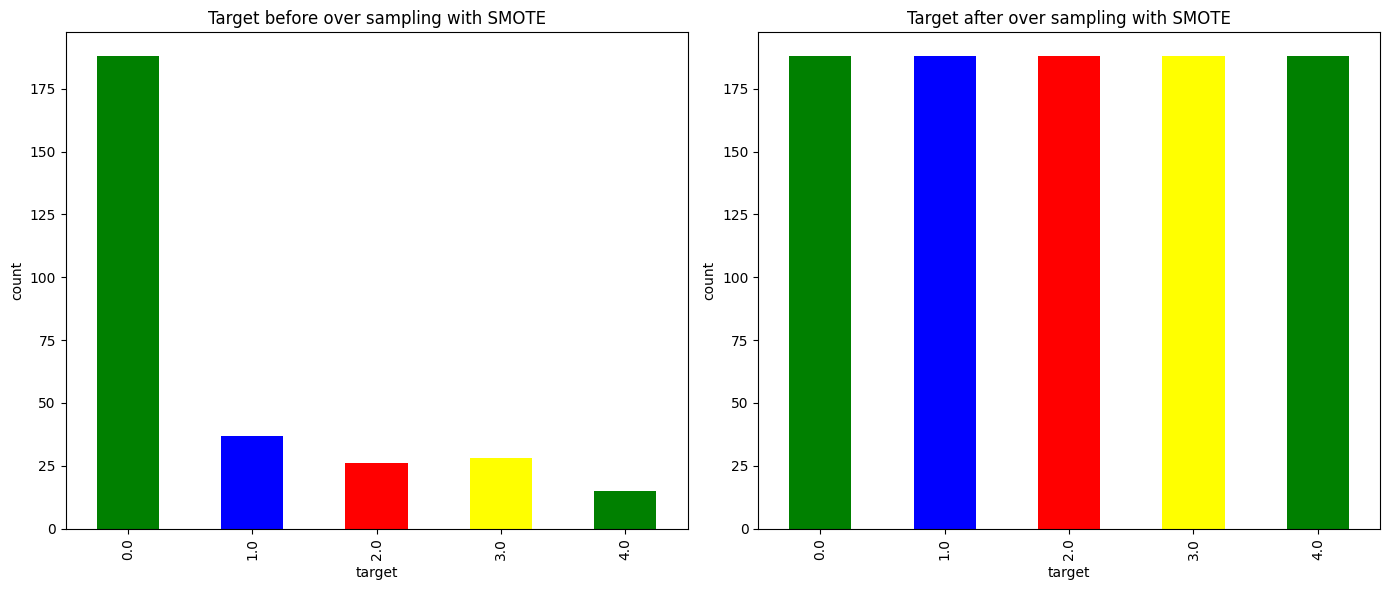

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Asumsikan df_selected adalah DataFrame yang sudah Anda miliki dan telah diproses
# Mengganti nama kolom terakhir dari 'num' ke 'target' agar sesuai dengan output yang diinginkan
df_selected.rename(columns={'num': 'target'}, inplace=True)

# Mengisi nilai NaN dengan median dari masing-masing kolom
imputer = SimpleImputer(strategy='median')
df_selected_imputed = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Visualisasi distribusi target sebelum oversampling
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df_selected_imputed['target'].value_counts().sort_index().plot(kind='bar', color=['green', 'blue', 'red', 'yellow'])
plt.title('Target before over sampling with SMOTE')
plt.xlabel('target')
plt.ylabel('count')

# Pisahkan fitur dan target
X = df_selected_imputed.drop(columns=['target'])
y = df_selected_imputed['target']

# Lakukan oversampling menggunakan SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualisasi distribusi target sesudah oversampling
plt.subplot(1, 2, 2)
pd.Series(y_res).value_counts().sort_index().plot(kind='bar', color=['green', 'blue', 'red', 'yellow'])
plt.title('Target after over sampling with SMOTE')
plt.xlabel('target')
plt.ylabel('count')

plt.tight_layout()
plt.show()

7.Pemodelan
dalam Project ini meggunakan 3 algoritma yang kemudian dikomparasi
akurasinya satu sama lain.
yaitu :
1. XGBoost 
2.Decision Tree 
3.Random Forest 

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:48:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.89
Decision Tree Accuracy: 0.76
Random Forest Accuracy: 0.88


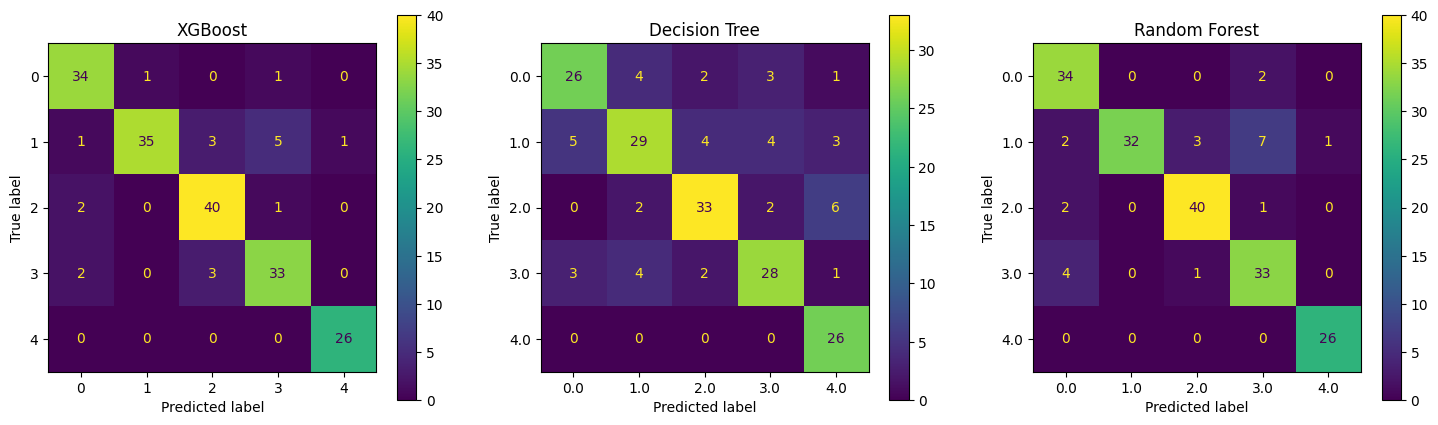

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Bagi data menjadi set pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)

# Melatih model
xgb_model.fit(X_train_scaled, y_train)
dec_tree.fit(X_train_scaled, y_train)
rand_forest.fit(X_train_scaled, y_train)

# Prediksi menggunakan model
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_dec_tree = dec_tree.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)

print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dec_tree:.2f}')
print(f'Random Forest Accuracy: {accuracy_rand_forest:.2f}')

# Menampilkan Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, model, y_pred, title in zip(
    axes,
    [xgb_model, dec_tree, rand_forest],
    [y_pred_xgb, y_pred_dec_tree, y_pred_rand_forest],
    ['XGBoost', 'Decision Tree', 'Random Forest']
):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, values_format='d')
    ax.set_title(title)

plt.show()

Evaluasi untuk XGBoost:
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1-Score: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91        36
         1.0       0.97      0.78      0.86        45
         2.0       0.87      0.93      0.90        43
         3.0       0.82      0.87      0.85        38
         4.0       0.96      1.00      0.98        26

    accuracy                           0.89       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.89      0.89       188



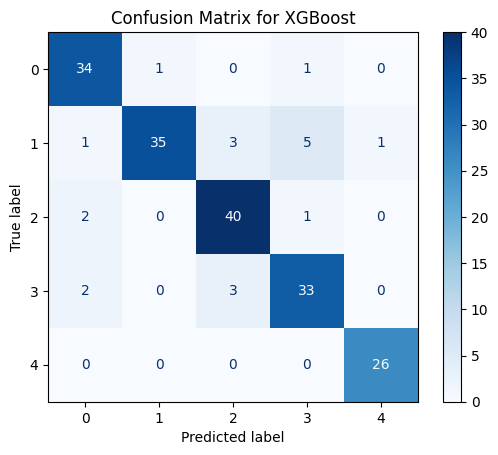

Evaluasi untuk Decision Tree:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-Score: 0.75

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        36
         1.0       0.74      0.64      0.69        45
         2.0       0.80      0.77      0.79        43
         3.0       0.76      0.74      0.75        38
         4.0       0.70      1.00      0.83        26

    accuracy                           0.76       188
   macro avg       0.75      0.77      0.76       188
weighted avg       0.76      0.76      0.75       188



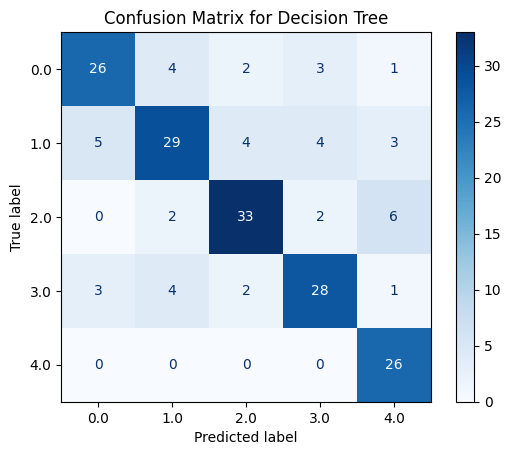

Evaluasi untuk Random Forest:
Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-Score: 0.88

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        36
         1.0       1.00      0.71      0.83        45
         2.0       0.91      0.93      0.92        43
         3.0       0.77      0.87      0.81        38
         4.0       0.96      1.00      0.98        26

    accuracy                           0.88       188
   macro avg       0.89      0.89      0.88       188
weighted avg       0.89      0.88      0.88       188



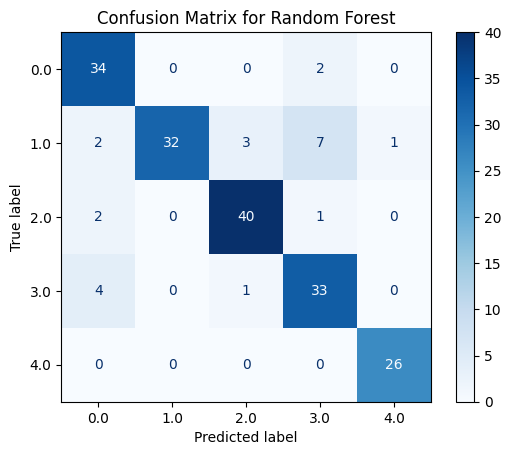

In [104]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model
models = {
    'XGBoost': (xgb_model, y_pred_xgb),
    'Decision Tree': (dec_tree, y_pred_dec_tree),
    'Random Forest': (rand_forest, y_pred_rand_forest)
}

for model_name, (model, y_pred) in models.items():
    print(f"Evaluasi untuk {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

8. Kesimpulan
Dari 3 komparasi algoritma ternyata paling accuracy adalah Xgboost dengan tingkat accuracy 89% 